## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

### MNIST

In [2]:
from sklearn import datasets

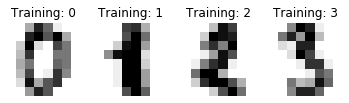

In [3]:
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
y = digits.target

#### Train-test split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    data, y, test_size=0.20, random_state=42)

## SVM

In [6]:
from sklearn import svm

In [7]:
clf = svm.SVC(gamma=0.001, kernel='rbf', probability=True)

clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [8]:
print(clf.n_support_)
print(clf.fit_status_)

[43 95 69 73 69 70 52 70 99 87]
0


In [9]:
y_test_pred = clf.predict(x_test)

In [10]:
y_test_pred_proba = clf.predict_proba(x_test)

## Evaluation

In [11]:
from sklearn import metrics

In [12]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, y_test_pred)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      1.00      1.00        30
           9       0.97      0.97      0.97        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      

In [13]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_test_pred))

Confusion matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0  1  0 39]]


In [14]:
print(y_test_pred_proba[0])

[0.00304876 0.00173853 0.00115706 0.00127229 0.00197081 0.00264626
 0.9795992  0.00106997 0.00439526 0.00310187]
